In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Exploration**

In [ ]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18905 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   18905 non-null  float64
 1   fWidth    18905 non-null  float64
 2   fSize     18905 non-null  float64
 3   fConc     18905 non-null  float64
 4   fConc1    18905 non-null  float64
 5   fAsym     18905 non-null  float64
 6   fM3Long   18905 non-null  float64
 7   fM3Trans  18905 non-null  float64
 8   fAlpha    18905 non-null  float64
 9   fDist     18905 non-null  float64
 10  class     18905 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.7 MB


In [ ]:
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  18905.000000  18905.000000  18905.000000  18905.000000  18905.000000   
mean      53.161416     22.145872      2.824643      0.380247      0.214560   
std       42.259789     18.300664      0.472377      0.182709      0.110384   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.359700     11.874200      2.477100      0.235800      0.128500   
50%       37.129500     17.143800      2.740000      0.354000      0.196400   
75%       69.975400     24.712400      3.101100      0.503500      0.285000   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  18905.000000  18905.000000  18905.000000  18905.000000  18905.000000   
mean      -4.177867     10.618826      0.259364     27.551644    193.712554   
std       59.010059     50.900687     20.775268     26.083055     74.685712   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.479100    -12.769300    -10.835800      5.516400    142.269000   
50%        4.062900     15.338000      0.750000     17.533000    191.832000   
75%       24.133500     35.869400     10.948900     45.704000    240.409000   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class  
count  18905.000000  
mean       0.652314  
std        0.476248  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [ ]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

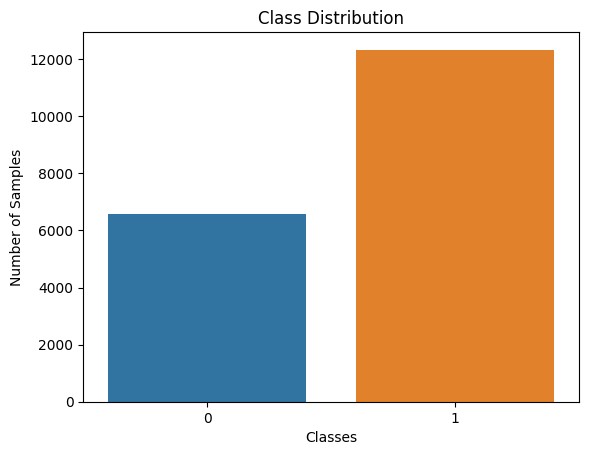

In [ ]:
sns.countplot(x="class", data=df)
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.show()

=> unbalanced dataset so we need to oversample the data

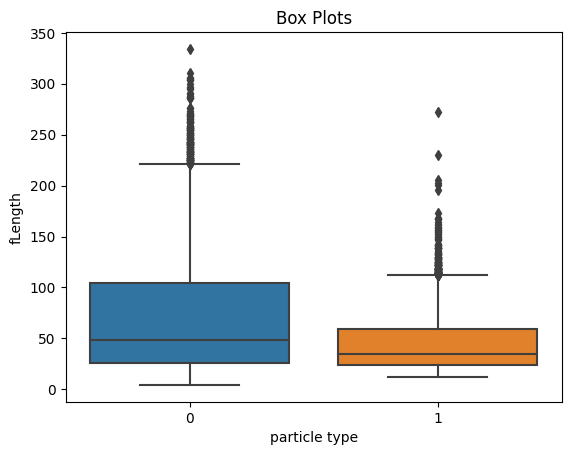

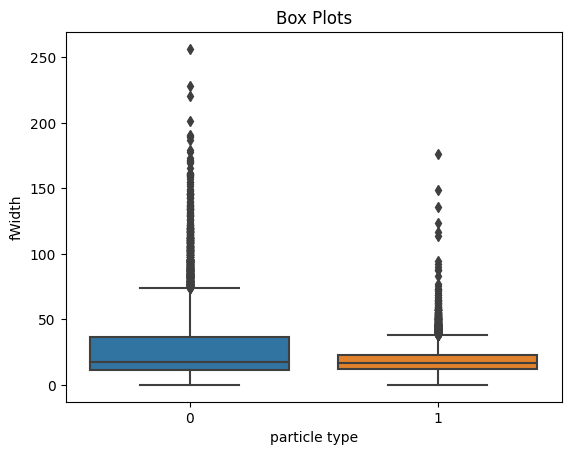

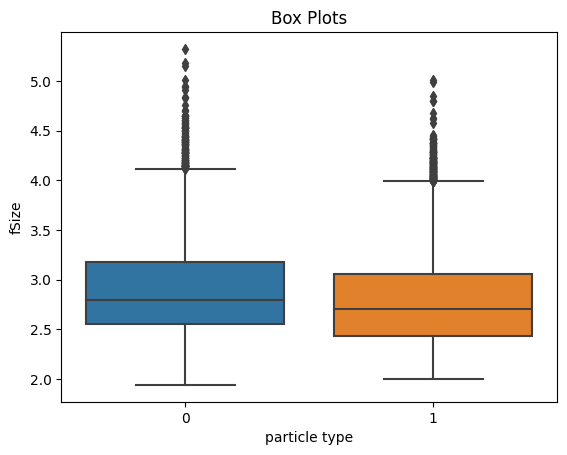

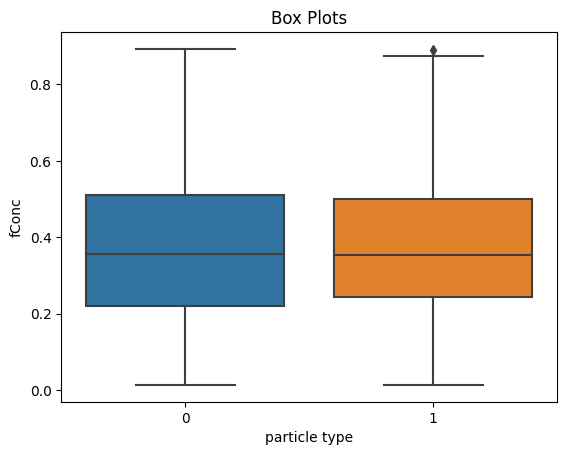

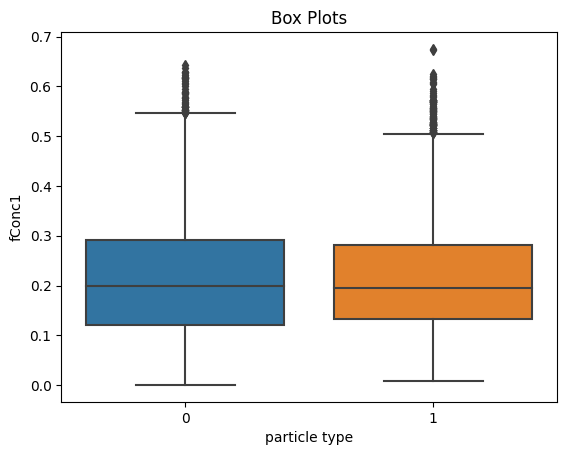

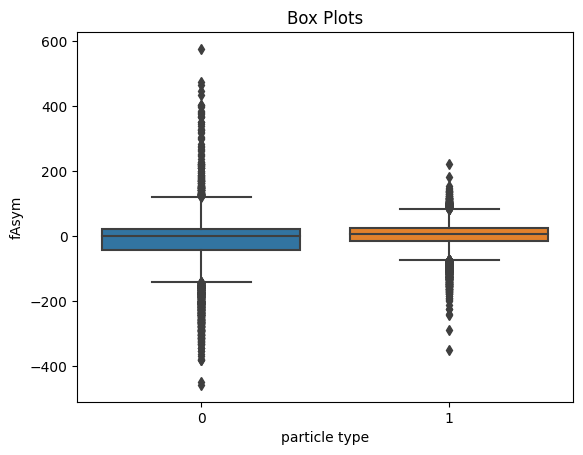

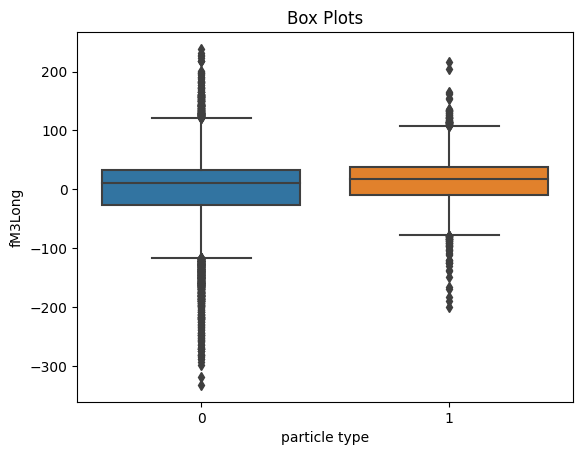

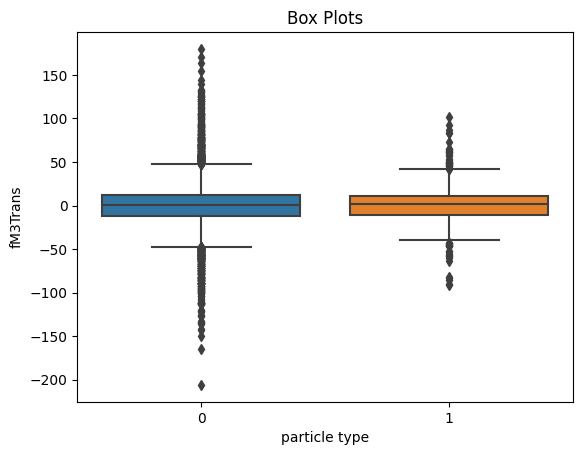

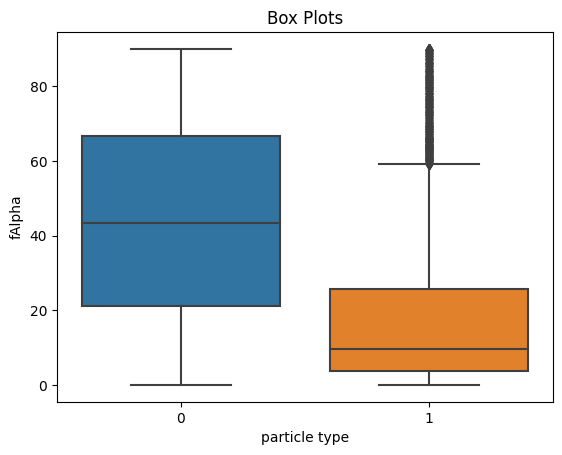

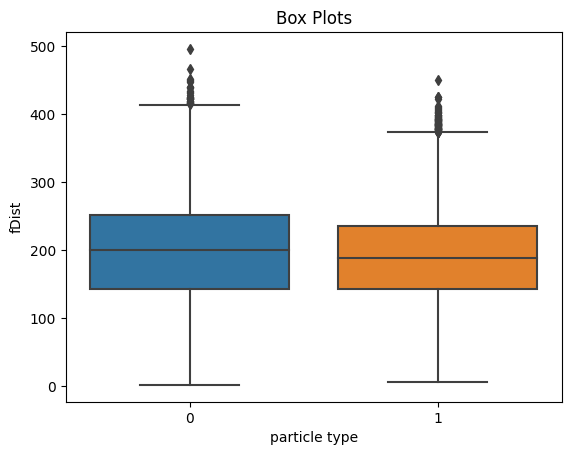

In [ ]:
for col in cols[:-1]:
  sns.boxplot(x="class", y=col, data=df)
  plt.title("Box Plots")
  plt.xlabel("particle type")
  plt.ylabel(col)
  plt.show()

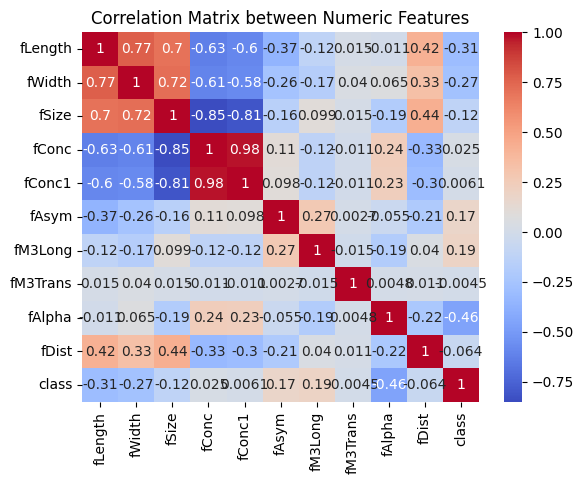

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix between Numeric Features")
plt.show()

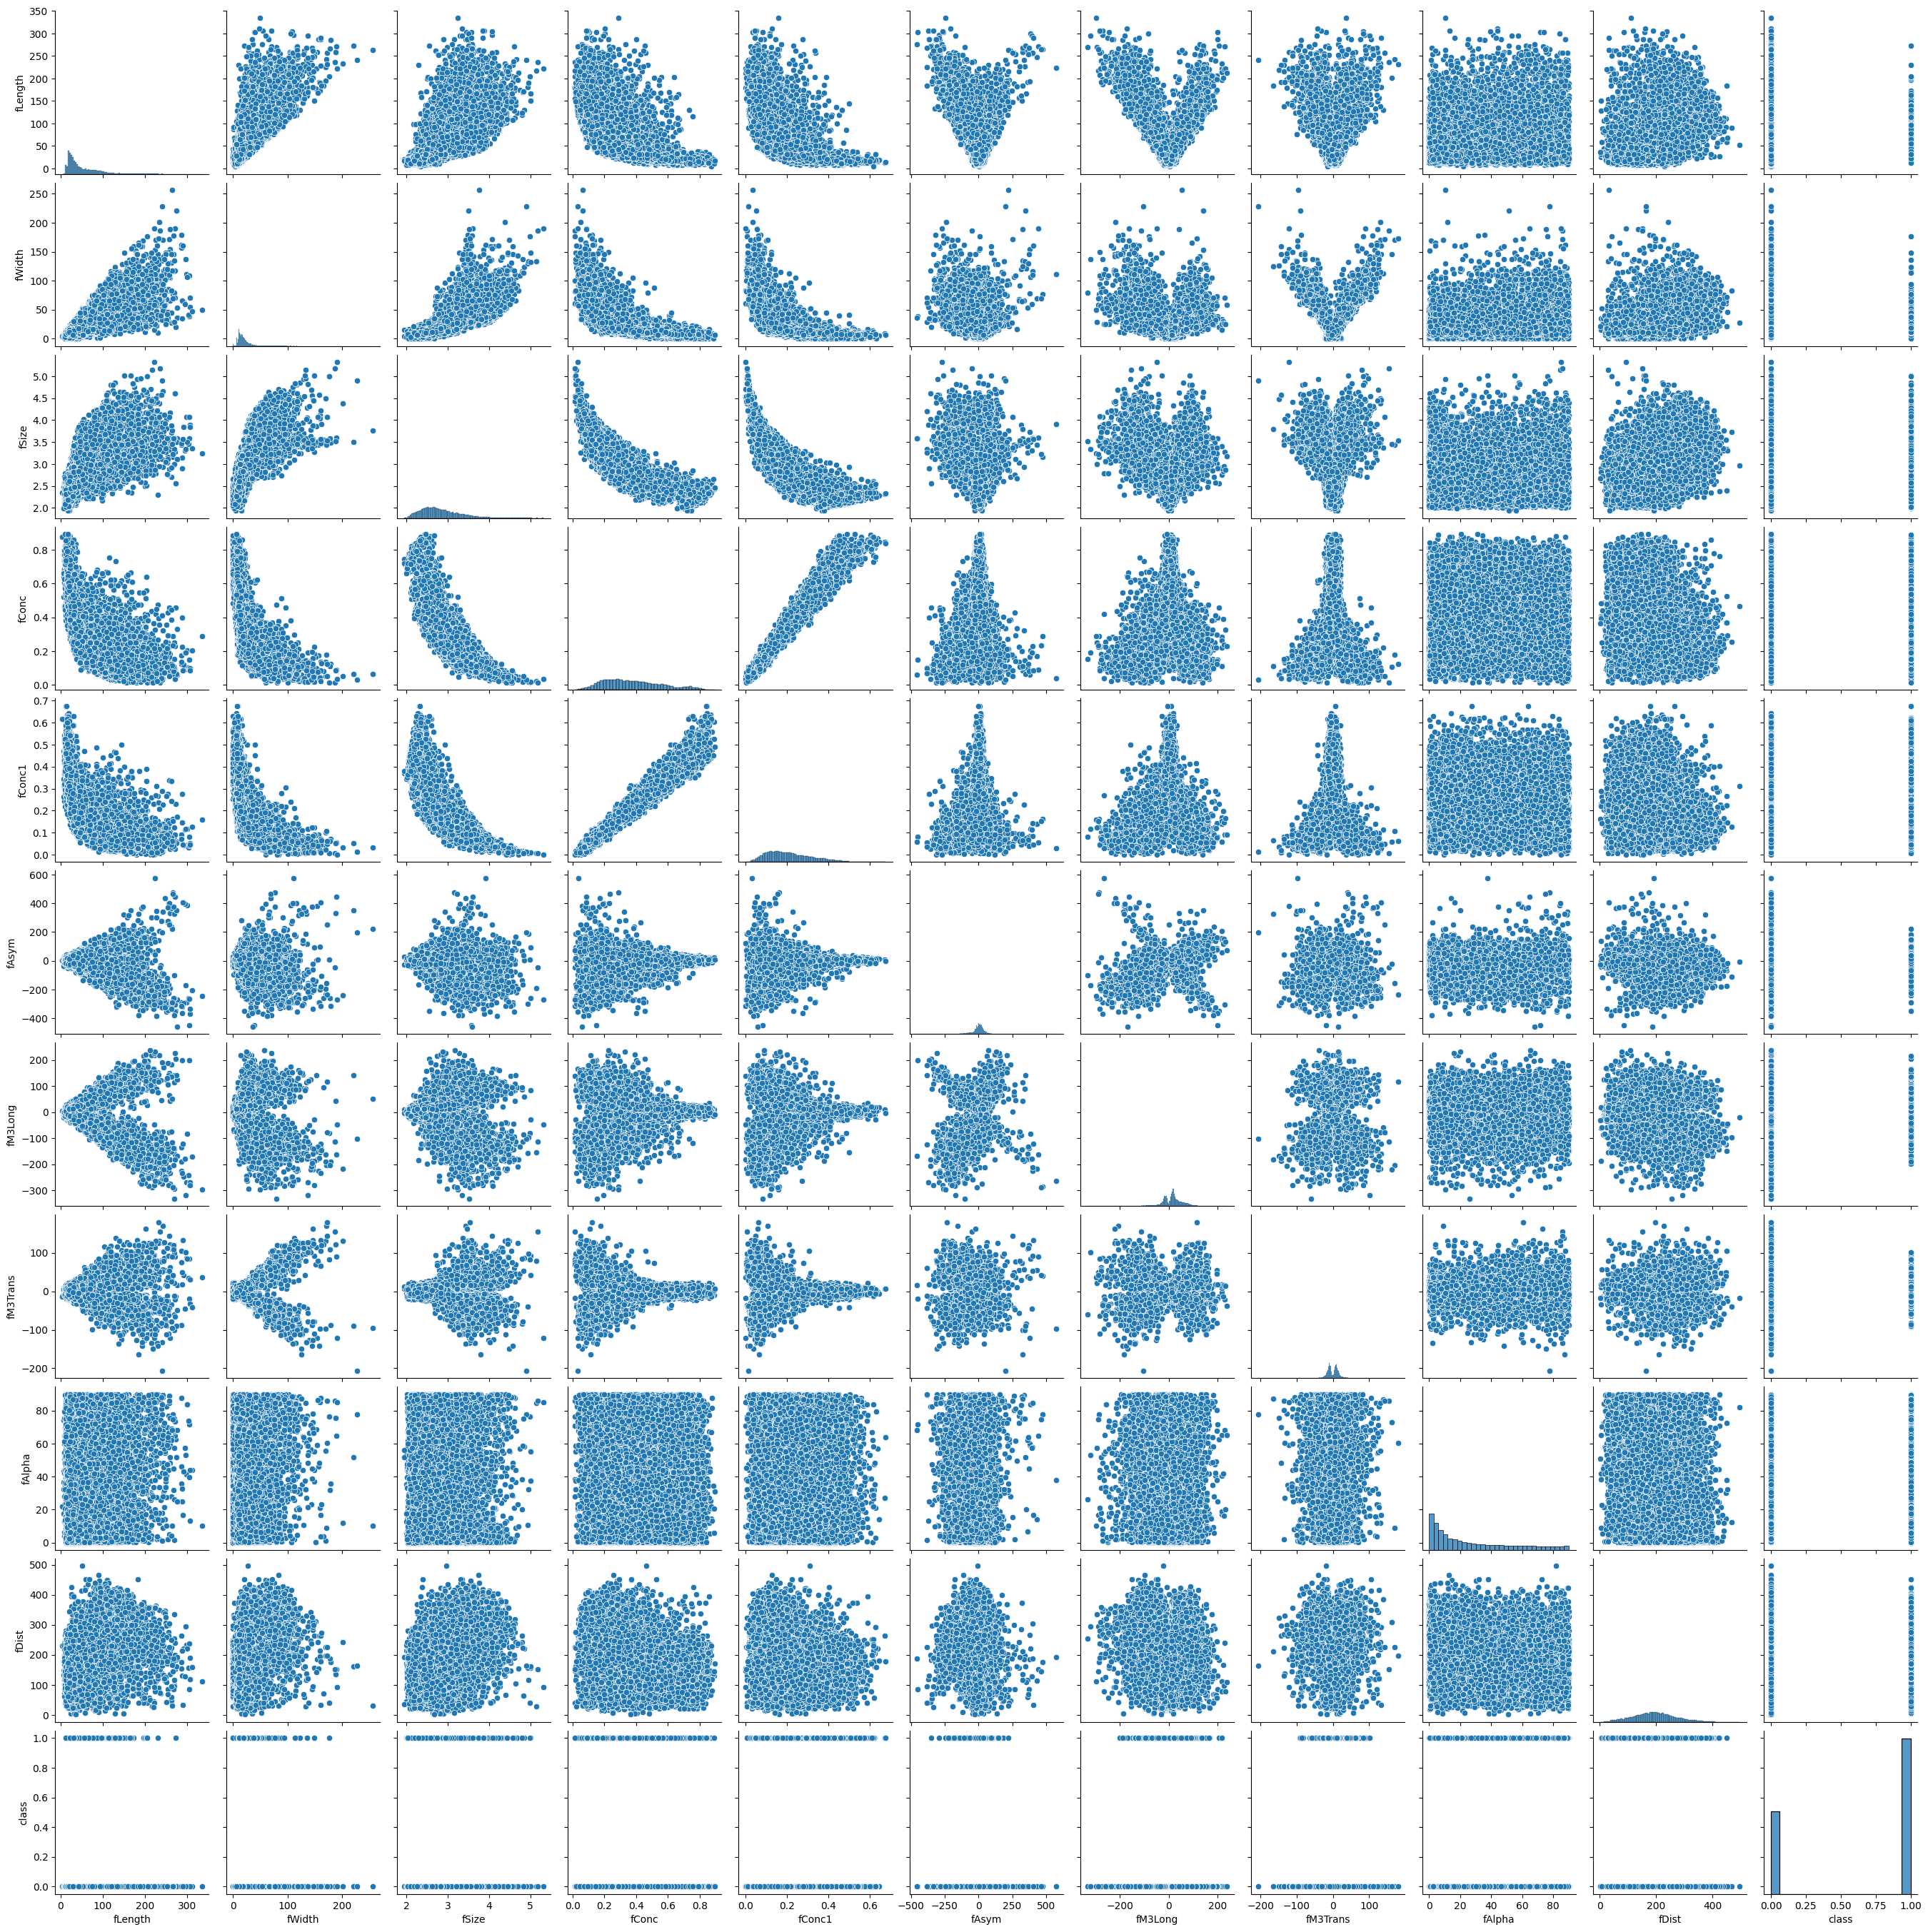

In [ ]:
sns.pairplot(data=df)
plt.show()

**Data Cleaning**

dealing with duplicates

In [ ]:
df = df.drop_duplicates()
df.describe()

fLength        fWidth         fSize         fConc        fConc1  \
count  18905.000000  18905.000000  18905.000000  18905.000000  18905.000000   
mean      53.161416     22.145872      2.824643      0.380247      0.214560   
std       42.259789     18.300664      0.472377      0.182709      0.110384   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.359700     11.874200      2.477100      0.235800      0.128500   
50%       37.129500     17.143800      2.740000      0.354000      0.196400   
75%       69.975400     24.712400      3.101100      0.503500      0.285000   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  18905.000000  18905.000000  18905.000000  18905.000000  18905.000000  
mean      -4.177867     10.618826      0.259364     27.551644    193.712554  
std       59.010059     50.900687     20.775268     26.083055     74.685712  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.479100    -12.769300    -10.835800      5.516400    142.269000  
50%        4.062900     15.338000      0.750000     17.533000    191.832000  
75%       24.133500     35.869400     10.948900     45.704000    240.409000  
max      575.240700    238.321000    179.851000     90.000000    495.561000

dealing with missing values

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
def handle_missing_values(df):
    # Fill missing values in numeric columns with the mean
    df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

    # Fill missing values in the "class" column with "g" because it is the dominant label in our dataset
    df['class'] = df['class'].fillna('g')

    return df

categorical variables encoding

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [ ]:
X, y = df.iloc[:, :-1], df["class"].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)


**Resampling**

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train1, y_train1)
X_test, y_test = smote.fit_resample(X_test1, y_test1)

**Régression Logistique**

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)


In [ ]:
param_grid = {
    'solver': ['lbfgs'],
    'C': [0.001, 0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1')# le critere d'evaluation est f1 et non pas l'accuarcy car unbalanced dataset


In [ ]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['lbfgs']},
             scoring='f1')

In [ ]:
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres trouvés:", best_params)


Meilleurs hyperparamètres trouvés: {'C': 0.1, 'solver': 'lbfgs'}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


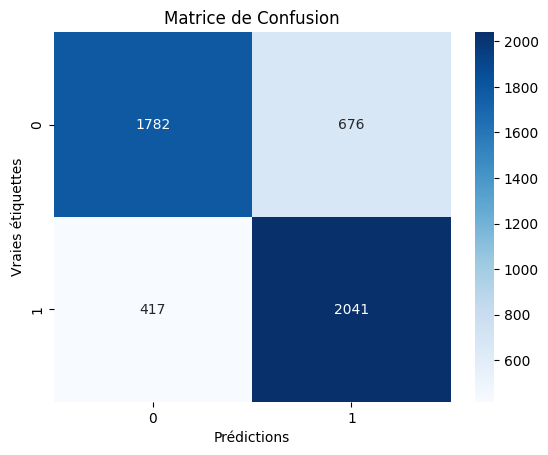

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Rapport de classification:\n", classification_rep)


Rapport de classification:
               precision    recall  f1-score   support

           0       0.81      0.72      0.77      2458
           1       0.75      0.83      0.79      2458

    accuracy                           0.78      4916
   macro avg       0.78      0.78      0.78      4916
weighted avg       0.78      0.78      0.78      4916



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#gridSearchCV pour détérminer la meilleure combinaisons des hypeparameters
param_grid = {
    'n_neighbors': list(range(5, 20)),
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19]},
             scoring='f1')

In [ ]:
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_
print(best_params)
print(best_knn_model)

{'metric': 'manhattan', 'n_neighbors': 5}
KNeighborsClassifier(metric='manhattan')


In [ ]:
from sklearn.metrics import classification_report
y_pred2 = best_knn_model.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2458
           1       0.74      0.84      0.79      2458

    accuracy                           0.77      4916
   macro avg       0.78      0.77      0.77      4916
weighted avg       0.78      0.77      0.77      4916



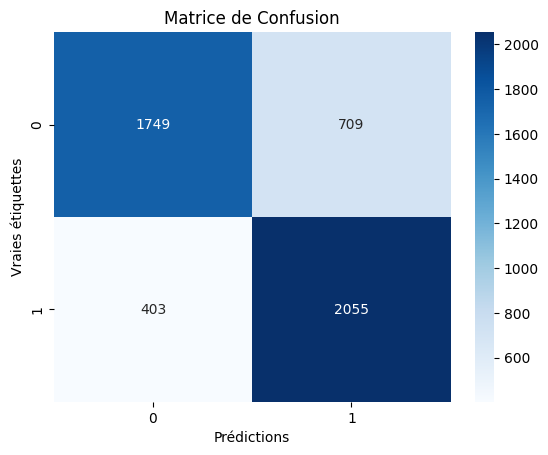

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred3 = svm_model.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      2458
           1       0.76      0.87      0.81      2458

    accuracy                           0.80      4916
   macro avg       0.80      0.80      0.80      4916
weighted avg       0.80      0.80      0.80      4916



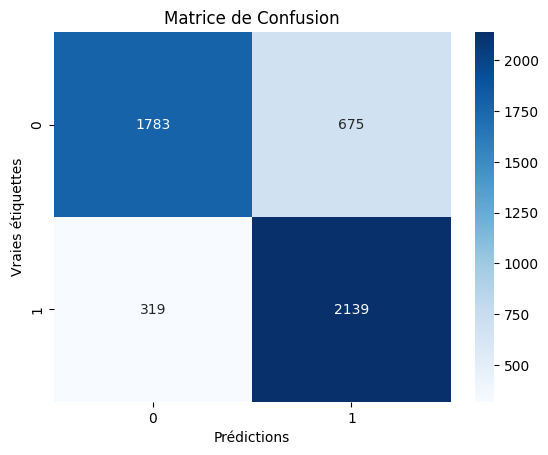

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)

sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid4 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,3,5,6,7,8,9,10]#on a 10 attributs
}

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
grid_search4 = GridSearchCV(estimator=dt, param_grid=param_grid4, scoring='f1', cv=5)
grid_search4.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 6, 7, 8, 9, 10]},
             scoring='f1')

In [ ]:
best_params4 = grid_search4.best_params_
best_dt_model = grid_search4.best_estimator_
print(best_params4)
print(best_dt_model)

{'criterion': 'entropy', 'max_depth': 9}
DecisionTreeClassifier(criterion='entropy', max_depth=9)


In [ ]:
y_pred4 =best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.75      0.83      2458
           1       0.79      0.96      0.87      2458

    accuracy                           0.85      4916
   macro avg       0.87      0.85      0.85      4916
weighted avg       0.87      0.85      0.85      4916



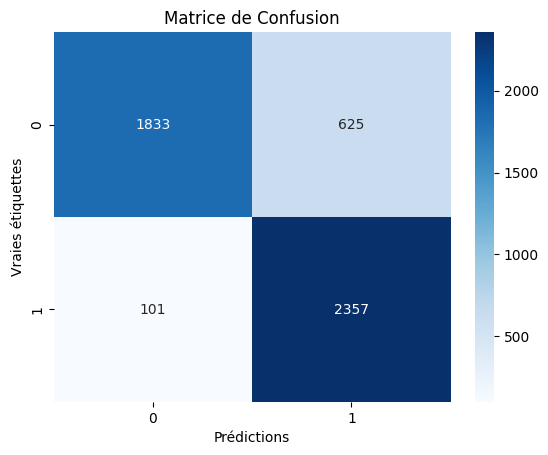

In [ ]:
cm4 = confusion_matrix(y_test, y_pred4)

sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

**voting classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
grid_params5 = {
    'lr__C': [0.1, 1.0, 10],
    'svc__C': [0.1, 1.0, 10],
    'dt__max_depth': [None, 10, 20],
    'voting': ['hard', 'soft'],
}

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', best_model),
    ('svc', svm_model),
    ('dt', best_dt_model),
    ('knn',best_knn_model)])

In [ ]:
grid_search5 = GridSearchCV(estimator=voting_classifier, param_grid=grid_params5, cv=5)

In [ ]:
grid_search5.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 363, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 404, in predict_proba
    self._collect_probas(X), axis=0, 

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=0.1,
                                                                        max_iter=1000)),
                                                    ('svc', SVC()),
                                                    ('dt',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=9)),
                                                    ('knn',
                                                     KNeighborsClassifier(metric='manhattan'))]),
             param_grid={'dt__max_depth': [None, 10, 20],
                         'lr__C': [0.1, 1.0, 10], 'svc__C': [0.1, 1.0, 10],
                         'voting': ['hard', 'soft']})

In [ ]:
best_params5 = grid_search5.best_params_
best_voting_model = grid_search5.best_estimator_
print(best_params5)
print(best_voting_model)

{'dt__max_depth': None, 'lr__C': 10, 'svc__C': 10, 'voting': 'hard'}
VotingClassifier(estimators=[('lr', LogisticRegression(C=10, max_iter=1000)),
                             ('svc', SVC(C=10)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('knn', KNeighborsClassifier(metric='manhattan'))])


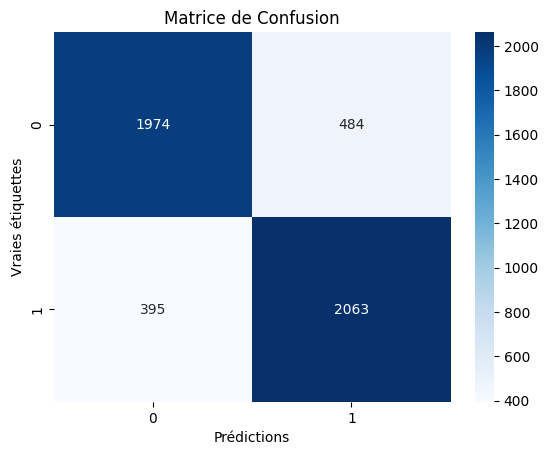

In [ ]:
y_pred5 =best_voting_model.predict(X_test)

cm5 = confusion_matrix(y_test, y_pred5)

sns.heatmap(cm5, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2458
           1       0.81      0.84      0.82      2458

    accuracy                           0.82      4916
   macro avg       0.82      0.82      0.82      4916
weighted avg       0.82      0.82      0.82      4916



le résultat est meilleur que tous les autres modèles: logistic regression, knn, SVM et Decision Tree

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
param_grid6 = {
    'n_estimators': [10, 30, 50, 80, 100],
    'max_depth': [1, 4, 5, 7, 8],
}

In [ ]:
grid_search6 = GridSearchCV(estimator=rf_model, param_grid=param_grid6, cv=5)

In [ ]:
grid_search6.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 4, 5, 7, 8],
                         'n_estimators': [10, 30, 50, 80, 100]})

In [ ]:
best_params6 = grid_search6.best_params_
best_rf_model = grid_search6.best_estimator_
print("Best Parameters: ", best_params6)

Best Parameters:  {'max_depth': 8, 'n_estimators': 50}


In [ ]:
y_pred6 = best_rf_model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred6))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      2458
           1       0.83      0.89      0.86      2458

    accuracy                           0.85      4916
   macro avg       0.86      0.85      0.85      4916
weighted avg       0.86      0.85      0.85      4916



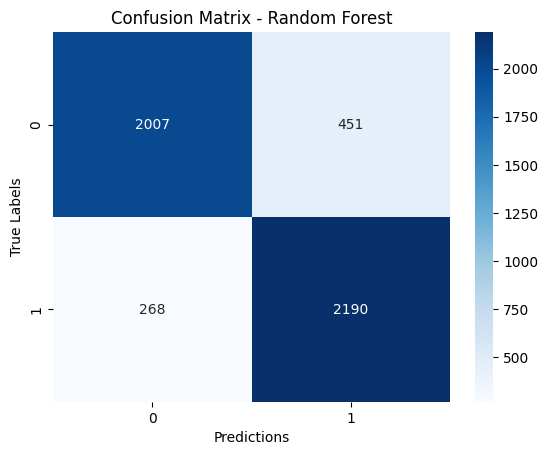

In [ ]:
cm6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm6, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**the random forest model is the best among the trained models**